<img style="width:450px;" src="https://durhamcollege.ca/wp-content/uploads/ai-hub-header.jpg" alt="DC Logo"/>

# LESSON 9 - Practical Regression

## <span style="color: green">OVERVIEW</span>

<hr />

>**Section 1:** <a href="#Linear-Regression">Linear Regression</a>

>**Section 2:** <a href="#Logistic-Regression">Logistic Regression</a>

>**Section 3:** <a href="#Polynomial-Regression">Polynomial Regression</a>

<hr />

This lesson takes the content from lessons 6 through 8 and guides you through a practical application of Linear, Logistic, and Polynomial Regression.

## <span style="color: green">SECTION 1</span>

### <span style="color: blue">Linear Regression</span>

**Lets take a look at some data, ask some questions and use linear regression to solve said questions.**

In [610]:
# imports
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

# this allows plots to appear directly in the notebook
%matplotlib inline

# read data into a DataFrame and verify contents
data = pd.read_csv('./goog.csv')
data.head(3)

,Date,Open,High,Low,Close,Volume
0,26-Feb-16,708.58,713.43,700.86,705.07,2239978
1,25-Feb-16,700.01,705.98,690.58,705.75,1631855
2,24-Feb-16,688.92,700.00,680.78,699.56,1958611


<hr />

**Now that we have our dataset, lets split the dates and prices into their own frames.**

In [611]:
# create a dataframe for the dates
# select the days only from the Date column using a for loop
dates = [int(i.split('-')[0]) for i in np.array(data)[:,0]]

# create a dataframe for the open prices
# select the data in the Open column
prices = np.array(data)[:,1]

# create a dataframe for the high prices
# select the data from the High column
high = np.array(data)[:,2]

prices = np.array([prices]).T
dates = np.array([dates]).T
#high = np.array([high]).T
#prices = np.hstack((price, high))

#print(dates)
print(prices)
#print(high)

[[708.58]
 [700.01]
 [688.92]
 [701.45]
 [707.45]
 [695.03]
 [710.0]
 [699.0]
 [692.98]
 [690.26]
 [675.0]
 [686.86]
 [672.32]
 [667.85]
 [703.87]
 [722.81]
 [770.22]
 [784.5]
 [750.46]]


<hr />

**With our price and date data split, we can now create functions to simplify the process.**

**The first function will be for predicting the price of a stock on day 'x'.**

In [612]:
# define a function for predicting the price
# given the dates and prices in a dataframe 
# and a day value represented as x
def predict_price(dates, prices, x):
    # initialize the linear regression model
    linear_mod = linear_model.LinearRegression()
    # fit the data to the model
    linear_mod.fit(dates, prices)
    # store the result of linear prediction at value x
    predicted_price = linear_mod.predict(x)
    # return the predicted price, linear coefficient, and the intercept
    return predicted_price, linear_mod.coef_, linear_mod.intercept_

<hr />

**Next, in order to properly show the variation in our methods, let's create a function for plotting our data points.**

**The second function will be for displaying a visualized plot of our data and prediction.**

In [613]:
# define a function for displaying a plot given
# the dates and prices data as X and Y values
def show_plot(dates, prices):
    # initialize the linear regression model
    linear_mod = linear_model.LinearRegression()
    # fit the submitted data to the model
    linear_mod.fit(dates, prices)
    # mark the scatter points using the dates and prices as X and Y values
    plt.scatter(dates, prices, color='lime')
    # plot the line of best fit using our model prediction
    plt.plot(dates, linear_mod.predict(dates), color='blue', linewidth=3)
    #display the model
    plt.show()
    return

<hr />

**With our functions in place let's test them!**

In [614]:
# display the result of the predict_prices function
# pass the function the dates, prices, and an x value
predict_price(dates, prices, 39)

(array([[ 664.37196832]]), array([[-1.65535515]]), array([ 728.93081909]))

<hr />

**Now let's view our plot.**

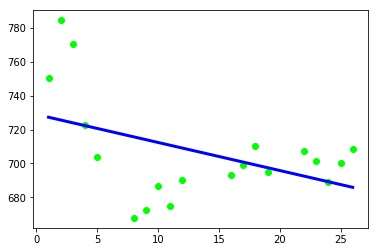

In [615]:
# display the result of the show_plot function
show_plot(dates, prices)

## <span style="color: green">SECTION 2</span>

### <span style="color: blue">Logistic Regression</span>


**For this practical example we will be using a prepared dataset provided by sklearn's 'datasets' class.**

**The dataset we will be using is called *'iris'*. The goal for this example is to predict the target value by using the feature values**.

In [616]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model, datasets

<hr />

**This enables us to simply load a dataset by calling a simple function that returns a *'bunch'* of data - quite literally.**

<hr />

A *'bunch'* is similar to a data-dictionary, as it provides attributes for our dataset, mainly:

>**‘data’, the data to learn**

>**‘target’, the classification labels**

>‘target_names’, the meaning of the labels

>‘feature_names’, the meaning of the features

>‘DESCR’, the full description of the dataset

**In order to build our new dataframe - we will need to extract the data and the target!**

<hr />

*The code below will load the **iris** dataset's **bunch** of data so we can then store it in a dataframe.*

>*iris = datasets.load_iris()*


*Click the link below to learn more about this command and the other datasets: *

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html">Documentation</a>

<hr />

**With the above in mind, let's get the *iris dataset bunch* so we can turn it into a dataframe using pandas' *'DataFrame()'* function.**

In [617]:
# import some data to play with using sklearn's datasets.load_iris() function
iris = datasets.load_iris()
# display the chunk feature names or description
print(iris.feature_names)

# use pandas to combine the data with the target
# define the column/feature names for our new dataframe
df = pd.DataFrame(np.c_[iris.data, iris.target], columns = ["Sepal Length", "Sepal Width", 
                                                            "Petal Length", "Petal Width", 
                                                            "Class"])
# verify successful creation of the dataframe
#df.head()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<i>It is always good practice to verify your data before continuing to the next step!</i>

<hr />
<br />
<b>With our dataset extracted into a dataframe, let's now select the features we want to use to plot our logistic regression.
<br /><br />
This will extract the data for the selected features and allow us to combine it with the target values in a new dataframe.
</b>

>After we have our sub-frame of selected features and their relative target values; We can randomize the order using *shuffle* to increase the variability between results.

<b>
By shuffling before splitting our data into training and testing pools, it will help us to verify the effectiveness of the logistic regression model on our data by ensuring it is always trained/tested on a different series of data.
</b>

#### Target Values:
- Setosa
- Versicolour
- Virginica

In [618]:
# select the first two features from the bunch data and combine it with the target values
data = np.c_[iris.data[:, :2], iris.target]

# shuffle the data for increased variability when splitting into train/test
np.random.shuffle(data)

#print(data)

<hr />

**Now that we have our data together and randomized, let's assign the 'X' and 'y' data to be plotted.**

**We can do this by simply selecting all rows (:), and then specifying the column number we want as our starting point (:# or #:).**

In [619]:
# for the X values, we want the first two columns ( :2 )
X = data[:, :2]

# for the y values, we want the last column, or everything after the first two ( 2: )
y = data[:, 2:]

#print(X)
#print(y)

<hr />

**Our data is now ready to be split into training and test sets.**

**However, before we split it, let's determine the point at which it will be split.**

>*We determine this using a factor of the data's shape to determine a row value which represents a location 70 percent of the way through the data.*

**For the training data we will select all of the data following the calculated row.**

In [620]:
# determine the percentile split of data for training and testing
# 0.7 is equal to 70/30 : test/train
test_train_split = 0.7

# get the training data for X using it's shape multiplied by 
# the split that was determined above to select the data AFTER that row
X_training = X[:int(X.shape[0]*test_train_split),:]
#print(int(X.shape[0]*train_test_split))

# get the training data for Y using it's shape multiplied by 
# the split that was determined above to select the data AFTER that row
y_training = y[:int(y.shape[0]*test_train_split)]
#print(int(y.shape[0]*train_test_split))

<hr />

**Our training data is prepared, now all we need to do is change the position of the ':' to select the data preceding the calculated row.**

**This technique makes it easy to manually assign data on the fly when tinkering with what is the most effective train/test split for your data.**

>*That being said, a split of 70/30 is the most common and should suffice in the majority of cases!*

In [621]:
# get the training data for X using it's shape multiplied by 
# the split that was determined above to select the data BEFORE that row
X_testing = X[int(X.shape[0]*test_train_split):,:]

# get the training data for Y using it's shape multiplied by 
# the split that was determined above to select the data BEFORE that row
y_testing = y[int(y.shape[0]*test_train_split):]

#print(X_testing)

<hr />

#### We should now take a look at our data to make sure everything looks okay

In [622]:
#print(y_testing)
#print(y_testing.ravel())
#print(y_testing.shape)

<hr />

#### If our data looks good, it's time to initialize the logistic regression model we imported from sklearn

In [623]:
# Initialize the model using the LogisticRegression function
logreg = linear_model.LogisticRegression()

<hr />

<b>Then we need to fit the training data to the model</b>

In [624]:
# We use the initialized function to then fit the data.
logreg.fit(X_training, y_training.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<hr />

<b>
 With the training data fit, we can now run prediction on the test data using the '*predict()*' function
</b>

In [625]:
# run prediction on the test data and store it as 'Z'
Z = logreg.predict(X_testing)

# compare the data
#print(Z)
#print(y_testing.ravel())

<hr />

<b>
Now that we have our predictions, we need to define a function for determining the classification rate
</b>

In [626]:
def classification_rate(y, Z):
    num_right = 0
    for i in range(len(Z)):
        if y[i] == Z[i]:
            num_right = num_right + 1
    return num_right/Z.shape[0]

<hr />

<b>
Let's execute the function we created above to compare the values, and then return an overall percentage of successful predictions
</b>

In [627]:
classification_rate(y_testing.ravel(), Z)

0.7333333333333333

<hr />

### Well this isn't that great now is it?
#### What comes next? 
>Well, a simple adaptation we can make is to implement ***K-fold Cross Validation*** training and see how our output changes

<hr />

<b>
In order to do so we need to import the required libraries first
</b>

In [628]:
from sklearn import metrics, model_selection
from sklearn.linear_model import LogisticRegression

<hr />

<b>
Now that we have the libraries we need, let's implement cross validation and see the classification rate of the predictions it creates.
</b>

In [629]:
Z_cross_validation = model_selection.cross_val_predict(LogisticRegression(), X, y.ravel(), cv=10)

print(model_selection.cross_val_score(LogisticRegression(), X, y.ravel()))

[ 0.74509804  0.70588235  0.77083333]


<hr />

**With our new cross validation predictions let's see what the classification rate changed too.**

In [630]:
classification_rate(y.ravel(), Z_cross_validation)

0.7666666666666667

<hr />

### This is not that much better...
#### There are many different classification algorithms sklearn has available to utilize in a similar way to what was demonstrated above. 

The following will be touched on in future lessons:
1. SVM
2. Naive Bayes
3. Decision Trees
4. Random Forests
5. Neural Networks

<hr />

## <span style="color: green">SECTION 3</span>

### <span style="color: blue">Polynomial Regression</span>

#### With the variety of classification available, it is important to understand the origin of many of these advanced regression analysis techniques - polynomial regression.

In [631]:
import numpy as np
# from scipy.interpolate import *
import matplotlib.pyplot as plt

%matplotlib inline

#### We're going to take a look at some synthetic data for this one
Hopefully this will help visualize what's going on a bit better

In [632]:
##### Create a couple arrays with 
X = np.array([0,1,2,3,4,5])
y = np.array([0,0.8,0.9,0.1,-0.8,-0.5])

# print to observe
print(X)
print(y)

[0 1 2 3 4 5]
[ 0.   0.8  0.9  0.1 -0.8 -0.5]


<hr />

**Let's begin fitting our data. The polyfit method uses the sum of square errors to compute the line of best fit.**

*In this first piece of code, we're going to stick with a straight line*

In [633]:
# The last parameters is a 1 for now as we'll do linear to begin with
# We will use the 'polyfit()' function to determine the slope 
# and intercept from our data
p1 = np.polyfit(X, y, 1)

# This prints the slope and intercept
print(p1)

[-0.23142857  0.66190476]


<hr />

<b>Now that we have our slope and intercept, let's plot it as a first degree polynomial</b>

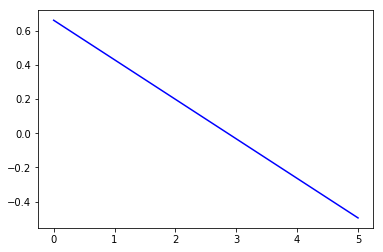

In [634]:
# polyval plots the data with respect to the slope, intercept, and data
plt.plot(X, np.polyval(p1, X), color='blue')

<hr />
#### Now we'll move on to quadratric and cubes functions and repeat the process

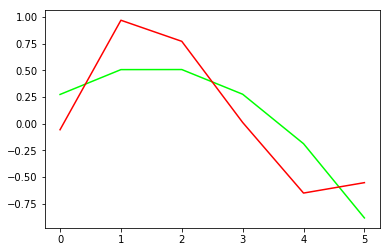

In [635]:
# use the polyfit() function
p2 = np.polyfit(X, y, 2)
p3 = np.polyfit(X, y, 3)

# use polyval to plot the data again
plt.plot(X, np.polyval(p2, X), color='lime')
plt.plot(X, np.polyval(p3, X), color='red')

<hr />

*Observe the p1 values*

In [636]:
p1 # y = Ax + b

array([-0.23142857,  0.66190476])

<hr />
*Observe the p2 values*

In [637]:
p2 # y = Ax^2 + Bx + C

array([-0.11607143,  0.34892857,  0.275     ])

<hr />
*Observe the p3 values*

In [638]:
p3 # y = Ax^3 + Bx^2 + Cx + D

array([ 0.11018519, -0.94246032,  1.85846561, -0.05555556])

<hr />

<b>
Now let's see how these plots all fit together.
</b>

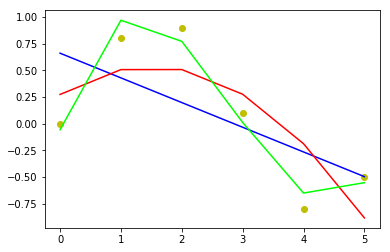

In [639]:
# plot the data points
# ('yo' just means yellow circle markers)
plt.plot(X,y,'yo')

xp = X
#xp = np.linspace(-2,6,100)

# plot the data
plt.plot(xp, np.polyval(p1,xp), color='blue')
plt.plot(xp, np.polyval(p2,xp), color='red')
plt.plot(xp, np.polyval(p3,xp), color='lime')

<hr />

<b>Display the polynomial values for each defined point on the plot.</b>

In [640]:
np.polyval(p3, X)

array([-0.05555556,  0.97063492,  0.77301587,  0.01269841, -0.64920635,
       -0.5515873 ])

<img style="width:350px;" src="http://m.memegen.com/hn5ckz.jpg" />